# Wk5_Notebook (Text analytics using Python)

In this notebook, I will show how libraries from the Python ecosystem can be used to conduct a textual analysis. More specifically, the following topics will be discussed:
- [Working with (text) files](#Wk5_a)
- [Text preprocessing](#Wk5_b)
- [Measuring document sentiment (tone)](#Wk5_c)
- [Measuring text complexity (readability)](#Wk5_d)
- [Measuring textual similarity](#Wk5_e)

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string
import nltk

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In accounting research and practice, textual data - which may originate from different sources - is increasingly being quantitatively analyzed. A quantitative analysis of such data requires that the (unstructured) data first needs to be transformed into numerical measures representing variables of interest (structured data). Different kinds of quantitative analysis of textual data - such as measuring document sentiment (tone), text complexity (readability) and textual similarity - can next be used to study a variety of accounting topics. The Python ecosystem, both Python itself and specialized libraries such as NLTK, offers many great functionalities to conduct a quantitative analysis of textual data. In this notebook, I will provide an introduction to some specific textual analysis methods and techniques commonly used in accounting research.

## Working with (text) files <a name="Wk5_a"></a>

It is sometimes necessary to know in which directory (folder) you are currently working, for example if you want to save files in the same directory or (if you have you already done so) to obtain the absolute path to these files. There are at least two ways by which you can obtain this information:
```python
%pwd
```
Or:
```python
import os
os.getcwd()
```

In [2]:
# Identify the current working directory

%pwd

'C:\\Users\\mse700\\Desktop\\DAAC - github\\Notebooks'

Somewhat similar to how we have earlier in this course iterated over the contents of containers using a `for` loop, you can also iterate over the files in a directory (folder) and perform some operation on these files. For example, in the following code cell, I use the 'Path' class from Python's __pathlib__ module in combination with the `glob()` function to iterate over the files in a directory, and print the names of all files in that directory whose name starts with 'Doc' and whose extension is '.txt'.

In [3]:
# Print the names of specified files in a directory

# Import required module
from pathlib import Path

# Assign directory
directory = 'C:\\Users\\mse700\\Desktop\\DAAC - github\\Notebooks\\data'

# Iterate over files in that directory
files = Path(directory).glob('Doc*.txt')
for file in files:
    print(file)

C:\Users\mse700\Desktop\DAAC - github\Notebooks\data\Document_01.txt
C:\Users\mse700\Desktop\DAAC - github\Notebooks\data\Document_02.txt
C:\Users\mse700\Desktop\DAAC - github\Notebooks\data\Document_03.txt
C:\Users\mse700\Desktop\DAAC - github\Notebooks\data\Document_04.txt
C:\Users\mse700\Desktop\DAAC - github\Notebooks\data\Document_05.txt
C:\Users\mse700\Desktop\DAAC - github\Notebooks\data\Document_06.txt
C:\Users\mse700\Desktop\DAAC - github\Notebooks\data\Document_07.txt
C:\Users\mse700\Desktop\DAAC - github\Notebooks\data\Document_08.txt
C:\Users\mse700\Desktop\DAAC - github\Notebooks\data\Document_09.txt
C:\Users\mse700\Desktop\DAAC - github\Notebooks\data\Document_10.txt


As another example, in the following code cell, I use the 'Path' class from Python's __pathlib__ module in combination with the `glob()` function to iterate over the files in a directory, and print the contents of all files in that directory whose name starts with 'Doc' and whose extension is '.txt'.

In [4]:
# Print the contents of specified files in a directory

# Import required module
from pathlib import Path

# Assign directory
directory = 'C:\\Users\\mse700\\Desktop\\DAAC - github\\Notebooks\\data'

# Iterate over files in that directory
files = Path(directory).glob('Doc*.txt')
for file in files:
    fhand = open(file, 'r', encoding="utf8")
    text = fhand.read()
    print(text)

My favorite dog is fluffy and tan.
the dog is brown and cat is brown
My favorite hat is brown and coat is pink
My dog has a hat and leash. ♥
He has a fluffy coat and brown coats.
The dog is brown and fluffy & has a brown coat.
MY dog is white with brown spots.
The white dog has a Pink coat and the Brown dog is fluffy
The 3 fluffy dogs AND 2 brown hats are my favorites!
MY fluffy dog has a white coat and hat .


And as yet another example, in the following code cell, I use the 'Path' class from Python's __pathlib__ module in combination with the `glob()` function to iterate over the files in a directory, and include the contents of all files in that directory whose name starts with 'Doc' and whose extension is '.txt' in a list and/or DataFrame.

In [5]:
# Include the contents of specified files in a directory in a list and/or DataFrame

# Import required module
from pathlib import Path

# Assign directory
directory = 'C:\\Users\\mse700\\Desktop\\DAAC - github\\Notebooks\\data'

# Iterate over files in that directory
all_text = []
files = Path(directory).glob('Doc*.txt')
for file in files:
    fhand = open(file, 'r', encoding="utf8")
    text = fhand.read()
    all_text.append(text)

# Include the contents of the files in a DataFrame
df = pd.DataFrame({'text': all_text})
df

,text
0,My favorite dog is fluffy and tan.
1,the dog is brown and cat is brown
2,My favorite hat is brown and coat is pink
3,My dog has a hat and leash. ♥
4,He has a fluffy coat and brown coats.
5,The dog is brown and fluffy & has a brown coat.
6,MY dog is white with brown spots.
7,The white dog has a Pink coat and the Brown do...
8,The 3 fluffy dogs AND 2 brown hats are my favo...
9,MY fluffy dog has a white coat and hat .


## Text preprocessing <a name="Wk5_b"></a>

The text data preprocessing process is an important part of a typical text analytics project. Much of the methods that are used in this process have their roots in natural language processing. Text preprocessing takes an input of raw text and returns cleansed tokens. Tokens are single words or groups of words that are tallied by their frequency and serve as the features of the analysis. The preprocessing process consists of a number of steps in which the text data are standardized by removing unnecessary information from the original text. Anandarajan et al. (2019) provide the following figure to describe the text data preprocessing process (note that below I discuss the different steps in a slightly different order):

<div>
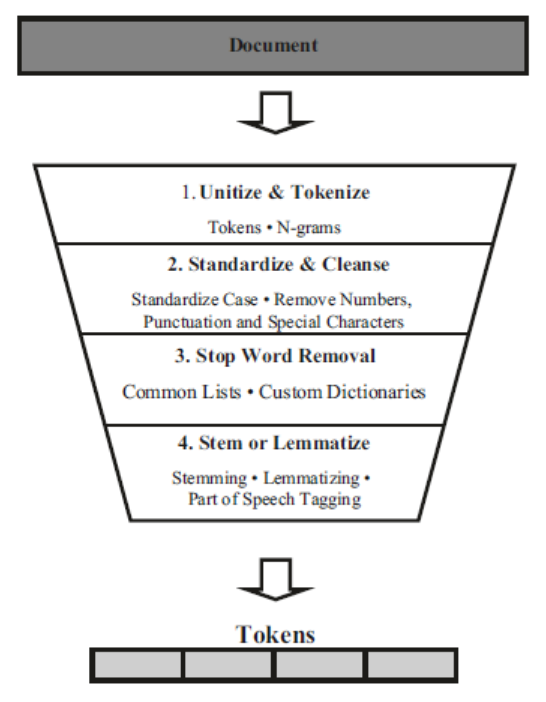
</div>

The tasks in the different preprocessing steps can typically be solved in different ways. In this notebook, I don't show all possibilities, but instead I will show the solutions that I personally prefer the most. Also, I will show solutions for both the situation in which a single text (i.e., string) needs to be preprocessed, as well as the situation in which text data (i.e., strings) that is included in a column of a DataFrame needs to be preprocessed.

### Standardize case

An important preprocessing task is making sure that all characters share the same type of case (i.e., either all upper- or lowercase), where researchers mostly choose to make them all lowercase. When preprocessing a single string, you can use the `lower()` (string) method for this purpose. When preprocessing strings that are included in a column of a DataFrame, you can either use the `lower()` (string) method (preceded by `str.`) for this purpose, or apply (by using the `apply()` method) a `lambda` function that uses the `join()`, `split()` and `lower()` (string) methods (see below).

In [6]:
# Standardize case (single string)

first_doc = all_text[0]
first_doc = first_doc.lower()
first_doc

'my favorite dog is fluffy and tan.'

In [7]:
# Standardize case (column of a DataFrame)

df['text'] = df['text'].str.lower()
#df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df

,text
0,my favorite dog is fluffy and tan.
1,the dog is brown and cat is brown
2,my favorite hat is brown and coat is pink
3,my dog has a hat and leash. ♥
4,he has a fluffy coat and brown coats.
5,the dog is brown and fluffy & has a brown coat.
6,my dog is white with brown spots.
7,the white dog has a pink coat and the brown do...
8,the 3 fluffy dogs and 2 brown hats are my favo...
9,my fluffy dog has a white coat and hat .


### Remove numbers

Another important preprocessing task, which is not always but is often done, is removing the numbers from the text. When preprocessing a single string, you can use list comprehension in combination with the `join()` and `isdigit()` (string) methods for this purpose. When preprocessing strings that are included in a column of a DataFrame, you can apply (by using the `apply()` method) a `lambda` function that uses the `join()`, `split()` and `isdigit()` (string) methods (see below).

In [8]:
# Remove numbers (single string)

first_doc = ''.join([i for i in first_doc if not i.isdigit()])
first_doc

'my favorite dog is fluffy and tan.'

In [9]:
# Remove numbers (column of a DataFrame)

df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if not x.isdigit()))
df

,text
0,my favorite dog is fluffy and tan.
1,the dog is brown and cat is brown
2,my favorite hat is brown and coat is pink
3,my dog has a hat and leash. ♥
4,he has a fluffy coat and brown coats.
5,the dog is brown and fluffy & has a brown coat.
6,my dog is white with brown spots.
7,the white dog has a pink coat and the brown do...
8,the fluffy dogs and brown hats are my favorites!
9,my fluffy dog has a white coat and hat .


### Remove punctuation and special characters

Another important preprocessing task is removing the punctuation and special characters from the text. The built-in __string__ module contains a string of ASCII characters which are considered to be punctuation characters (`string.punctuation`) that can be used for this purpose, for example by defining a function in which you use a `for` loop to replace (using the `replace()` (string) method) all characters in a text that are included in `string.punctuation` by an empty space. When preprocessing a single string, you can then call this function to remove the punctuation and special characters from the text. Alternatively, you can also use a combination of the `translate()` and `maketrans()` (string) methods. When preprocessing strings that are included in a column of a DataFrame, you can apply (by using the `apply()` method) the user-defined function (see below). (It is important to note that when analyzing real-world text data, it may first be necessary to add punctuation characters to `string.punctuation`. This can be done using the string methods that I discussed earlier in the course.)

In [10]:
# Print 'string.punctuation' to see its contents

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [11]:
# Add a character to 'string.punctuation', and print it

string.punctuation = string.punctuation + '♥'
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~♥


In [12]:
# Define a function to remove punctuation and special characters

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [13]:
# Remove punctuation and special characters (single string)

first_doc = remove_punctuations(first_doc)
#first_doc = first_doc.translate(first_doc.maketrans('', '', string.punctuation))
first_doc

'my favorite dog is fluffy and tan'

In [14]:
# Remove punctuation and special characters (column of a DataFrame)

df['text'] = df['text'].apply(remove_punctuations)
df

,text
0,my favorite dog is fluffy and tan
1,the dog is brown and cat is brown
2,my favorite hat is brown and coat is pink
3,my dog has a hat and leash
4,he has a fluffy coat and brown coats
5,the dog is brown and fluffy has a brown coat
6,my dog is white with brown spots
7,the white dog has a pink coat and the brown do...
8,the fluffy dogs and brown hats are my favorites
9,my fluffy dog has a white coat and hat


### Remove stopwords

Another important preprocessing task is removing the stopwords from the text. Stopwords are very common words that carry no meaning or less meaning compared to other keywords. If you remove the commonly used words, you can focus on the important keywords. It is important to emphasize that: (a) no universal list of stopwords exists since what is considered uninformative depends on the context of the application, and (b) we do not always remove the stopwords. The different natural language processing libraries each contain a stopwords list, and also many variations of these lists exist and are used in practice. For example, Tim Loughran and Bill McDonald have developed several stopword lists (see https://sraf.nd.edu/textual-analysis/resources/). For most cases, they recommend using their "generic" list, which is based on the stopword list used by the NLTK library. Their other lists are context specific and not necessarily exhaustive. When preprocessing a single string, you can use list comprehension in combination with the `join()` and `split()` (string) methods and the `not` and `in` keywords for this purpose. When preprocessing strings that are included in a column of a DataFrame, you can apply (by using the `apply()` method) a `lambda` function that uses the `join()` and `split()` (string) methods and the `not` and `in` keywords (see below). (It is important to note that when analyzing real-world text data, it may first be necessary to adjust an existing stopword list by either adding words to the list or removing words from the list. This can be done using the list methods that I discussed earlier in the course.)

In [15]:
# Remove stopwords (single string)

from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')

first_doc = ' '.join([word for word in first_doc.split() if word not in sw_nltk])
first_doc

'favorite dog fluffy tan'

In [16]:
# Remove stopwords (column of a DataFrame)

from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw_nltk))
df

,text
0,favorite dog fluffy tan
1,dog brown cat brown
2,favorite hat brown coat pink
3,dog hat leash
4,fluffy coat brown coats
5,dog brown fluffy brown coat
6,dog white brown spots
7,white dog pink coat brown dog fluffy
8,fluffy dogs brown hats favorites
9,fluffy dog white coat hat


### Tokenize text

Another important preprocessing task is tokenizing the text; i.e., to split the text in single words or groups of words. The different natural language processing libraries offer special methods for this task (e.g., the `sent_tokenize` and `word_tokenize` methods that are available when using the NLTK library), but when preprocessing a single string, you can also just use the `split()` (string) method for this purpose. When preprocessing strings that are included in a column of a DataFrame, however, it is typically easiest to apply (by using the `apply()` method) a special method from one of the natural language processing libraries (see below).

In [17]:
# Tokenize text (single string)

first_doc = first_doc.split()
first_doc

['favorite', 'dog', 'fluffy', 'tan']

In [18]:
#nltk.download('punkt')

In [19]:
# Tokenize text (column of a DataFrame)

from nltk.tokenize import word_tokenize

df['text'] = df['text'].apply(word_tokenize)
df 

,text
0,"[favorite, dog, fluffy, tan]"
1,"[dog, brown, cat, brown]"
2,"[favorite, hat, brown, coat, pink]"
3,"[dog, hat, leash]"
4,"[fluffy, coat, brown, coats]"
5,"[dog, brown, fluffy, brown, coat]"
6,"[dog, white, brown, spots]"
7,"[white, dog, pink, coat, brown, dog, fluffy]"
8,"[fluffy, dogs, brown, hats, favorites]"
9,"[fluffy, dog, white, coat, hat]"


### Stemming

Another important preprocessing task, which is not always but may be done, is to perform either stemming or lemmatization on the documents. Stemming and lemmatization involve breaking words down to their root word. As explained by Arandarajan et al. (2019, p. 54), "Stemming involves the removal of a word’s suffix to reduce the size of the vocabulary. Lemmatization is similar to stemming, except it incorporates information about the term’s part of speech. Both methods combine words that contain the same root into a single token to reduce the number of unique tokens within the analysis set." In this notebook, I will only show how to do stemming, as this seems to be more often used in accounting research than lemmatization. The different natural language processing libraries offer special methods for this task (e.g., the `PorterStemmer()` method that is available when using the NLTK library), which can both be used for this purpose when preprocessing a single string and when preprocessing strings that are included in a column of a DataFrame. When preprocessing a single string, you then also need to use list comprehension. When preprocessing strings that are included in a column of a DataFrame, you can apply (by using the `apply()` method) a `lambda` function that uses list comprehension and the `join()` (string) method and a special stemming method for this purpose (see below).

In [20]:
# Stemming (single string)

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

first_doc = [stemmer.stem(t) for t in first_doc]
first_doc

['favorit', 'dog', 'fluffi', 'tan']

In [21]:
# Stemming (column of a DataFrame)

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

df['text'] = df['text'].apply(lambda x: " ".join([stemmer.stem(word) for word in x]))
df

,text
0,favorit dog fluffi tan
1,dog brown cat brown
2,favorit hat brown coat pink
3,dog hat leash
4,fluffi coat brown coat
5,dog brown fluffi brown coat
6,dog white brown spot
7,white dog pink coat brown dog fluffi
8,fluffi dog brown hat favorit
9,fluffi dog white coat hat


## Measuring document sentiment (tone) <a name="Wk5_c"></a>

Overall, there are two ways to identify meaningful information content in the form of sentiment (tone) from text documents (Anand et al., 2020, *FTA*): (1) using machine learning and (2) using pre-determined dictionaries of word classifications. With the first approach, an algorithm first looks for differentiating patterns in previously labeled textual data, and then it applies learned patterns to label the remaining unlabeled data. With the second approach, textual analysis relies on an input dictionary (provided by the researcher), where each textual document is represented by its relative frequencies of words from the input dictionary. In this notebook, I will focus on the second approach.

There are many different dictionaries available for sentiment (tone) analysis, not only general purpose dictionaries, but also dictionaries that have especially been developed for the business domain. For example, Tim Loughran and Bill McDonald have developed a number of dictionaries (wordlists) that are widely used in accounting and finance research (see https://sraf.nd.edu/textual-analysis/resources/). And depending on your research question, you can always construct your own dictionary. Before performing a large scale word count based on a specific dictionary, it is important to understand the structure of the input dictionary. That is, it is typically necessary to first perform a preprocessing process (such as the one described above, although there can also be additional issues that preferably are taken care of, such as negations) before being able to do the actual sentiment (tone) analysis.

It is important to be aware that these kinds of analyses, similar to many other kinds of textual analyses, rely on the critical assumption of independence of words. In this context, this implies that the order, and thus direct context, of a word (as part of a document) is unimportant. Approaches where word sequence is ignored are typically labeled as ‘bag-of-words’ approaches. With such approaches, each piece of text is represented as a vector of words and their counts. Anand et al. (2020, *FTA*, p. 295-296) provide the following example to make this clear:  

"For example, phrases “cash flows from operations” and “cash flows from investing” can be represented as vectors u and v, respectively, as follows:

| | Cash | Flows | From | Investing | Operations |
| --- | --- | --- | --- | --- | --- |
| u | 1 | 1 | 1 | 0 | 1 |
| v | 1 | 1 | 1 | 1 | 0 |

In this example, vector u = (1, 1, 1, 0, 1) is defined on a feature space of all words present in the two phrases above, and includes 1 for each word occurrence in phrase “cash flows from operations”, and 0 for each word absence. If the word “cash” appeared two times in that phrase (e.g., “cash flows from cash operations”), vector u would include 2 for “cash” word component: u = (2, 1, 1, 0, 1). Vector v represents word counts for “cash flows from investing” and is defined in a similar manner. Note that the order of words, their part of speech, sentence structure, and other linguistic information is not recorded in bag-of-words vectors."

Another important issue to be aware of is that in these kinds of analyses sentiment (tone) can be measured in different ways, such as:
- Proportion of words, which is equal to the total number of times that the words from the wordlist occur in the text normalized by (i.e., divided by) the total number of words in the text.
- Unique counts of words, which is equal to the number of words from the wordlist that occur at least once in the text normalized by (i.e., divided by) the number of words in the wordlist.

Let's look at an example by analyzing the Management Discussion and Analysis (MD&A) section from the annual report of General Motors of 2019, using the 'negative' wordlist of Loughran and McDonald (LM).

In [22]:
# Open the text file, read its contents, close the file, and print the text

with open('data\mdna_2019_gm.txt', 'r', encoding="utf8") as fhand:
    gm_19 = fhand.read()
    fhand.close()

print(gm_19)

https://www.sec.gov/ix?doc=/Archives/edgar/data/1467858/000146785820000028/gm201910k.htm

Item 7. Management’s Discussion and Analysis of Financial Condition and Results of Operations
This MD&A should be read in conjunction with the accompanying audited consolidated financial statements and notes. Forward-looking statements in this MD&A are not guarantees of future performance and may involve risks and uncertainties that could cause actual results to differ materially from those projected. Refer to the "Forward-Looking Statements" section of this MD&A and Item 1A. Risk Factors for a discussion of these risks and uncertainties. The discussion of our financial condition and results of operations for the year ended December 31, 2017 included in Item 7. Management's Discussion and Analysis of Financial Condition and Results of Operations in our Annual Report on Form 10-K for the year ended December 31, 2018 is incorporated by reference into this MD&A.
Non-GAAP Measures Unless otherwise ind

In [23]:
# Standardize case (single string)

gm_19_alt = gm_19.lower()
print(gm_19_alt)

https://www.sec.gov/ix?doc=/archives/edgar/data/1467858/000146785820000028/gm201910k.htm

item 7. management’s discussion and analysis of financial condition and results of operations
this md&a should be read in conjunction with the accompanying audited consolidated financial statements and notes. forward-looking statements in this md&a are not guarantees of future performance and may involve risks and uncertainties that could cause actual results to differ materially from those projected. refer to the "forward-looking statements" section of this md&a and item 1a. risk factors for a discussion of these risks and uncertainties. the discussion of our financial condition and results of operations for the year ended december 31, 2017 included in item 7. management's discussion and analysis of financial condition and results of operations in our annual report on form 10-k for the year ended december 31, 2018 is incorporated by reference into this md&a.
non-gaap measures unless otherwise ind

In [24]:
# Remove numbers (single string)

gm_19_alt = ''.join([i for i in gm_19_alt if not i.isdigit()])

gm_19_alt = gm_19_alt.replace('-k', '10-k')  # Recover the word '10-k'

print(gm_19_alt)

https://www.sec.gov/ix?doc=/archives/edgar/data///gmk.htm

item . management’s discussion and analysis of financial condition and results of operations
this md&a should be read in conjunction with the accompanying audited consolidated financial statements and notes. forward-looking statements in this md&a are not guarantees of future performance and may involve risks and uncertainties that could cause actual results to differ materially from those projected. refer to the "forward-looking statements" section of this md&a and item a. risk factors for a discussion of these risks and uncertainties. the discussion of our financial condition and results of operations for the year ended december ,  included in item . management's discussion and analysis of financial condition and results of operations in our annual report on form 10-k for the year ended december ,  is incorporated by reference into this md&a.
non-gaap measures unless otherwise indicated, our non-gaap measures discussed in thi

In [25]:
# Remove punctuation and special characters (single string)

string.punctuation = string.punctuation + '“•”'  # Add characters to 'string.punctuation'

gm_19_alt = gm_19_alt.translate(gm_19_alt.maketrans('', '', string.punctuation))
print(gm_19_alt)

httpswwwsecgovixdocarchivesedgardatagmkhtm

item  management’s discussion and analysis of financial condition and results of operations
this mda should be read in conjunction with the accompanying audited consolidated financial statements and notes forwardlooking statements in this mda are not guarantees of future performance and may involve risks and uncertainties that could cause actual results to differ materially from those projected refer to the forwardlooking statements section of this mda and item a risk factors for a discussion of these risks and uncertainties the discussion of our financial condition and results of operations for the year ended december   included in item  managements discussion and analysis of financial condition and results of operations in our annual report on form 10k for the year ended december   is incorporated by reference into this mda
nongaap measures unless otherwise indicated our nongaap measures discussed in this mda are related to our continuing o

In [26]:
# Remove stopwords (single string)

from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')

gm_19_alt = ' '.join([word for word in gm_19_alt.split() if word not in sw_nltk])
print(gm_19_alt)

httpswwwsecgovixdocarchivesedgardatagmkhtm item management’s discussion analysis financial condition results operations mda read conjunction accompanying audited consolidated financial statements notes forwardlooking statements mda guarantees future performance may involve risks uncertainties could cause actual results differ materially projected refer forwardlooking statements section mda item risk factors discussion risks uncertainties discussion financial condition results operations year ended december included item managements discussion analysis financial condition results operations annual report form 10k year ended december incorporated reference mda nongaap measures unless otherwise indicated nongaap measures discussed mda related continuing operations discontinued operations nongaap measures include earnings interest taxes ebitadjusted presented net noncontrolling interests earnings income taxes ebtadjusted gm financial segment earnings per share epsdilutedadjusted effective 

In [27]:
# Tokenize text (single string)

gm_19_alt = gm_19_alt.split()
print(gm_19_alt)

['httpswwwsecgovixdocarchivesedgardatagmkhtm', 'item', 'management’s', 'discussion', 'analysis', 'financial', 'condition', 'results', 'operations', 'mda', 'read', 'conjunction', 'accompanying', 'audited', 'consolidated', 'financial', 'statements', 'notes', 'forwardlooking', 'statements', 'mda', 'guarantees', 'future', 'performance', 'may', 'involve', 'risks', 'uncertainties', 'could', 'cause', 'actual', 'results', 'differ', 'materially', 'projected', 'refer', 'forwardlooking', 'statements', 'section', 'mda', 'item', 'risk', 'factors', 'discussion', 'risks', 'uncertainties', 'discussion', 'financial', 'condition', 'results', 'operations', 'year', 'ended', 'december', 'included', 'item', 'managements', 'discussion', 'analysis', 'financial', 'condition', 'results', 'operations', 'annual', 'report', 'form', '10k', 'year', 'ended', 'december', 'incorporated', 'reference', 'mda', 'nongaap', 'measures', 'unless', 'otherwise', 'indicated', 'nongaap', 'measures', 'discussed', 'mda', 'related', 

In [28]:
# Calculate the word frequency, save as key-value pairs in a dictionary, and print the dictionary

counts = dict()
for word in gm_19_alt:
    if word not in counts:
        counts[word] = 1
    else:
        counts[word] = counts[word] + 1

print(counts)

# Alternatively, you can also use the Counter function that is built-in in Python (see the collections module).

{'httpswwwsecgovixdocarchivesedgardatagmkhtm': 1, 'item': 8, 'management’s': 1, 'discussion': 7, 'analysis': 3, 'financial': 55, 'condition': 4, 'results': 16, 'operations': 24, 'mda': 10, 'read': 1, 'conjunction': 1, 'accompanying': 1, 'audited': 1, 'consolidated': 21, 'statements': 30, 'notes': 1, 'forwardlooking': 10, 'guarantees': 2, 'future': 24, 'performance': 14, 'may': 21, 'involve': 1, 'risks': 10, 'uncertainties': 5, 'could': 11, 'cause': 1, 'actual': 7, 'differ': 4, 'materially': 5, 'projected': 3, 'refer': 18, 'section': 4, 'risk': 6, 'factors': 18, 'year': 46, 'ended': 41, 'december': 65, 'included': 7, 'managements': 1, 'annual': 3, 'report': 2, 'form': 1, '10k': 1, 'incorporated': 2, 'reference': 2, 'nongaap': 10, 'measures': 16, 'unless': 1, 'otherwise': 2, 'indicated': 1, 'discussed': 1, 'related': 44, 'continuing': 4, 'discontinued': 2, 'include': 15, 'earnings': 7, 'interest': 14, 'taxes': 5, 'ebitadjusted': 16, 'presented': 4, 'net': 36, 'noncontrolling': 2, 'intere

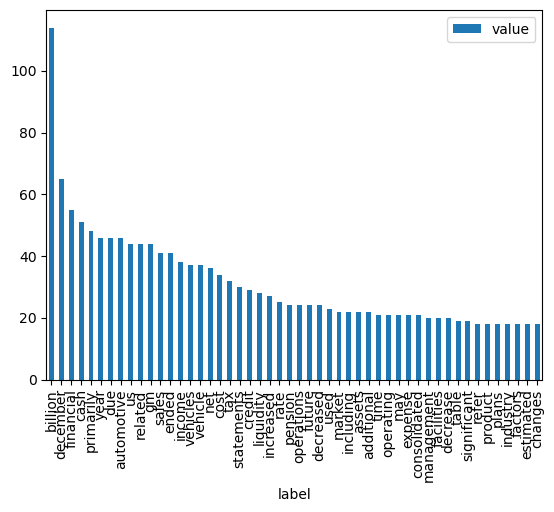

In [29]:
# Bar chart showing the word frequencies

lst = list()
for key, value in list(counts.items()):
    lst.append((int(value), key))

lst.sort(reverse = True)
lst = lst[:50]

lst = [(k, v) for (v, k) in lst]

pd.DataFrame(lst, columns=['label','value']).set_index('label').plot(kind='bar');

In [30]:
# Open the LM wordlist file, change all characters to lowercase and split the file in a list of words, and print the list

with open('data\LM_SentimentWordLists_2018 - Negative.txt', 'r', encoding="utf8") as fhand:
    word_lst = fhand.read()
    word_lst_adj = word_lst.lower().split()
    fhand.close()

print(word_lst_adj)

['abandon', 'abandoned', 'abandoning', 'abandonment', 'abandonments', 'abandons', 'abdicated', 'abdicates', 'abdicating', 'abdication', 'abdications', 'aberrant', 'aberration', 'aberrational', 'aberrations', 'abetting', 'abnormal', 'abnormalities', 'abnormality', 'abnormally', 'abolish', 'abolished', 'abolishes', 'abolishing', 'abrogate', 'abrogated', 'abrogates', 'abrogating', 'abrogation', 'abrogations', 'abrupt', 'abruptly', 'abruptness', 'absence', 'absences', 'absenteeism', 'abuse', 'abused', 'abuses', 'abusing', 'abusive', 'abusively', 'abusiveness', 'accident', 'accidental', 'accidentally', 'accidents', 'accusation', 'accusations', 'accuse', 'accused', 'accuses', 'accusing', 'acquiesce', 'acquiesced', 'acquiesces', 'acquiescing', 'acquit', 'acquits', 'acquittal', 'acquittals', 'acquitted', 'acquitting', 'adulterate', 'adulterated', 'adulterating', 'adulteration', 'adulterations', 'adversarial', 'adversaries', 'adversary', 'adverse', 'adversely', 'adversities', 'adversity', 'afte

In [31]:
# Calculations for the 'proportion of words' measure

counts = dict()
for word in gm_19_alt:
    if word in word_lst_adj:
        if word not in counts:
            counts[word] = 1
        else:
            counts[word] = counts[word] + 1

print(counts, '\n')
print(sum(counts.values()))

{'discontinued': 2, 'limitations': 1, 'impairment': 4, 'recall': 16, 'loss': 8, 'difficult': 1, 'closure': 1, 'stoppages': 2, 'restructuring': 3, 'lost': 4, 'unfavorable': 13, 'challenges': 2, 'weak': 2, 'disruptions': 2, 'volatility': 2, 'declines': 1, 'rationalization': 1, 'impairments': 2, 'weakness': 2, 'challenging': 1, 'investigations': 3, 'subpoenas': 1, 'complaints': 1, 'recalls': 3, 'claims': 4, 'damages': 1, 'fines': 1, 'criminal': 1, 'penalties': 1, 'restated': 1, 'bankruptcy': 1, 'exposed': 2, 'weakening': 4, 'losses': 4, 'divestiture': 1, 'absence': 2, 'downtime': 1, 'terminations': 1, 'litigation': 2, 'opportunistic': 1, 'terminated': 1, 'liquidation': 1, 'termination': 1, 'critical': 2, 'deviations': 1, 'underfunded': 1, 'negative': 3, 'unanticipated': 1, 'restructure': 1, 'disruption': 3, 'volatile': 1, 'exposes': 1, 'instability': 1, 'barriers': 1, 'crises': 1, 'downturns': 1, 'difficulties': 1, 'breaches': 1, 'punitive': 1, 'alleged': 1, 'defects': 1, 'caution': 1, 'u

In [32]:
# Print a statement about the 'proportion of words'

print(f"The negative words of Loughran and McDonald (2018) appear {sum(counts.values())} times in the text, \
which translates into a percentage of {sum(counts.values())/len(gm_19_alt):.2%} of all words in the text \
(after cleaning).")

The negative words of Loughran and McDonald (2018) appear 134 times in the text, which translates into a percentage of 2.42% of all words in the text (after cleaning).


In [33]:
# Calculations for the 'unique counts of words' measure (using a list)

incl_words_lst = [i for i in word_lst_adj if i in gm_19_alt]
print(incl_words_lst, '\n')
print(len(incl_words_lst))

['absence', 'alleged', 'bankruptcy', 'barriers', 'breaches', 'caution', 'challenges', 'challenging', 'claims', 'closure', 'complaints', 'criminal', 'crises', 'critical', 'damages', 'declines', 'defects', 'deviations', 'difficult', 'difficulties', 'discontinued', 'disruption', 'disruptions', 'divestiture', 'downtime', 'downturns', 'exposed', 'exposes', 'fines', 'impairment', 'impairments', 'instability', 'investigations', 'limitations', 'liquidation', 'litigation', 'loss', 'losses', 'lost', 'negative', 'opportunistic', 'penalties', 'punitive', 'rationalization', 'recall', 'recalls', 'restated', 'restructure', 'restructuring', 'stoppages', 'subpoenas', 'terminated', 'termination', 'terminations', 'unanticipated', 'underfunded', 'undue', 'unfavorable', 'volatile', 'volatility', 'weak', 'weakening', 'weakness'] 

63


In [34]:
# Calculations for the 'unique counts of words' measure (using a set)

incl_words_set = set(counts)
print(incl_words_set, '\n')
print(len(incl_words_set))

{'recalls', 'undue', 'negative', 'limitations', 'recall', 'rationalization', 'exposes', 'terminations', 'opportunistic', 'closure', 'termination', 'litigation', 'difficult', 'losses', 'exposed', 'discontinued', 'lost', 'bankruptcy', 'challenging', 'penalties', 'impairments', 'fines', 'weakening', 'divestiture', 'declines', 'investigations', 'restructuring', 'liquidation', 'absence', 'breaches', 'weakness', 'punitive', 'unanticipated', 'damages', 'challenges', 'downturns', 'difficulties', 'claims', 'stoppages', 'restated', 'downtime', 'crises', 'restructure', 'loss', 'volatility', 'terminated', 'disruptions', 'instability', 'volatile', 'complaints', 'critical', 'deviations', 'barriers', 'subpoenas', 'criminal', 'disruption', 'alleged', 'underfunded', 'caution', 'unfavorable', 'weak', 'impairment', 'defects'} 

63


In [35]:
# Print a statement about the 'unique counts of words'

print(f"Of the negative words of Loughran and McDonald (2018), {len(incl_words_lst)} appear in the text, \
which translates into a percentage of {len(incl_words_lst)/len(word_lst_adj):.2%} of all words in the wordlist.")

Of the negative words of Loughran and McDonald (2018), 63 appear in the text, which translates into a percentage of 2.68% of all words in the wordlist.


## Measuring text complexity (readability) <a name="Wk5_d"></a>

Text complexity refers to "a relative difficulty of reading, writing, or understanding a document, or a combination of these activities" (Anand et al., 2020, *FTA*). Accounting and finance researchers have, in particular, studied the complexity of corporate disclosures, such as the Management Discussion and Analysis (MD&A) section of firms' annual report. More complex disclosures are more difficult to read and comprehend and thus increase processing costs for users of such disclosures (Anand et al., 2020, *FTA*). Researchers provide at least two reasons of why some corporate textual disclosures are more complex than others (Anand et al., 2020, *FTA*). On the one hand, complex reporting may be an attempt by managers to obfuscate information or conceal a firm’s poor performance. On the other hand, complex disclosures may be the result of complex business operations and regulatory reporting requirements, and not intentional obfuscation by firm’s management. Regardless of the reason, complex disclosures are associated with negative externalities, such as less transparent information environments and increased financial misstatement risk (Anand et al., 2020, *FTA*). Quantifying text complexity is not a straightforward task as methods used to quantify text complexity depend on the research question (such as whether a researcher is interested in measuring the difficulty of *reading* or *preparing* corporate disclosures) and underlying text source.

To date, most accounting research in this area has focused on the relative difficulty of reading (i.e., the readability) of corporate disclosures, and used general text readability measures such as the fog index or Flesch-Kincaid readability score. For a given text, these measures output readability scores based on the average number of words per sentence and the average number of syllables per word, where higher scores indicate greater difficulty of reading the text (and thus higher text complexity). For example, the fog index (or Gunning fog index), which is widely used by accounting and finance researchers, is calculated as the weighted sum of the average number of words per sentence and the average number of complex words (i.e., words with three or more syllables) per word:

$$fog\ index = 0.4\ x\ [(all\ words\ /\ all\ sentences)\ +\ (100\ x\ (complex\ words\ /\ all\ words))]$$

As with most traditional readability measures created to differentiate grade school textbooks, the fog index estimates the number of years of education needed to understand the text on a first reading. Thus, a fog index value of 16 implies that the reader needs 16 years of education to comprehend the text on a first reading. Loughran and McDonald (2014, *JF*) empirically demonstrate that the fog index is a poorly specified readability measure when applied to business documents, mostly because syllable counts are problematic for such documents. As a simple proxy for readability of annual reports, Loughran and McDonald (2014, *JF*) suggest using the natural log of gross 10-K file size (complete submission text file) available on the SEC’s EDGAR website, while controlling for firm size. This measure is easy to obtain, does not require problematic parsing of 10-Ks, and allows for straightforward replication. As with all textual analysis methods and techniques, the use of readability measures must consider the context of application. For example, although file-size proxies make sense for documents such as 10-K filings, it is less clear that this is a distinguishing feature of the text from an earnings conference call. Also, importantly, if the intention is to measure document readability, then researchers face the problem of separating the business and the document.

There are numerous Python libraries that facilitate calculation of various text readability metrics, such as 'textstat' which we will use for this course (see https://pypi.org/project/textstat/).

In [36]:
# Install the library (first time only!)

#import sys
#!{sys.executable} -m pip install textstat

In [37]:
# Import the library

import textstat

In [38]:
# Syllable count

textstat.syllable_count(gm_19)

16910

In [39]:
# Lexicon count

textstat.lexicon_count(gm_19, removepunct=True)

9272

In [40]:
# Sentence count

textstat.sentence_count(gm_19)

437

In [41]:
# The Flesch Reading Ease formula

textstat.flesch_reading_ease(gm_19)

33.04

In [42]:
# The Flesch-Kincaid Grade Level

textstat.flesch_kincaid_grade(gm_19)

13.9

In [43]:
# The Fog Scale (Gunning FOG Formula)

textstat.gunning_fog(gm_19)

11.03

In [44]:
# Calculate the fog index for all (small) text documents in a directory

# import required module
from pathlib import Path

# assign directory
directory = 'C:\\Users\\Martijn Schoute\\Desktop\\DAAC_2021-2022_Materials\\Notebooks\\data'

# iterate over files in that directory
files = Path(directory).glob('Doc*.txt')
for file in files:
    fhand = open(file, 'r', encoding="utf8")
    text = fhand.read()
    fog = textstat.gunning_fog(text)
    print(text, fog)

## Measuring textual similarity <a name="Wk5_e"></a>

A common problem in textual analysis is to assess a degree of similarity between two (or more) pieces of text. Several studies in the accounting and finance literatures examine similarity of disclosures. For example, Cohen et al. (2020, *JF*) have used textual similarity analysis to examine whether changes to the language and construction of financial reports have implications for firms’ future returns and operations (and found that they have strong implications!). Text similarity can be defined on lexical and semantic levels (Anand et al., 2020, *FTA*). As explained by Anand et al. (2020, *FTA*, p. 294-295), "Lexical similarity refers to similarity stemming from usage of common words or characters (e.g., “good” and “goodness” share similar characters). Semantic similarity refers to similarity based on word/phrase meaning similarity (e.g., “good” and “nice” have similar meanings). Measuring semantic similarity is a significantly more difficult problem and most measures of text similarity in the accounting and finance fields are lexical." The length of text is an important factor when considering which similarity metric to use (Anand et al., 2020, *FTA*). As explained by Anand et al. (2020, *FTA*, p. 295), "If an input text is relatively long (five words or more), it is more appropriate to choose a similarity measure that operates on a word level. Conversely, if the text is rather short, it is more appropriate to work with measures that operate on a character level."

There are various similarity measures for relatively long pieces of text (Anand et al., 2020, *FTA*). Most accounting and finance researchers use the cosine similarity measure to compare texts. Cosine similarity between two vectors u and v (see above) is defined as the cosine of angle between these two vectors. Without going into the technical details, cosine similarity is a measure of distance between two vectors. Values close to 1 indicate a high degree of similarity between two vectors, and values close to 0 indicate little similarity. Since we can represent text as vectors using the bag-of-words approach, we can calculate distance (similarity) between pieces of text.

Below, I first show you a relatively simple textual similarity analysis, which I have taken from a textbook by Ana Bell (2018, *Get programming: Learn to code with Python*). In this analysis, the similarity between texts is calculated as the overlap (commonality) in terms of the words of the texts. Next, I will show you a more advanced textual similarity analysis, which I have taken from a paper by Anand et al. (2020, *FTA*). In this analysis, the similarity between texts is calculated as the cosine similarity between the texts. In this second analysis, several functions from the NLTK and Scikit-learn libraries are being used. You are not expected to know these individual functions for this course. It is enough to understand the overall process, and to be able to (slightly) adapt and use these Python codes to perform a (similar) textual similarity analysis.

### Relatively simple textual similarity analysis

In [45]:
# Define a 'read_text' function, and call it to import text data

def read_text(filename):
    """
    filename: string, name of file to read
    returns: string, contains all file contents
    """
    inFile = open(filename, 'r')
    line = inFile.read()
    return line

text = read_text("data\Document_01.txt")
print(text)

My favorite dog is fluffy and tan.


In [46]:
# Define a 'find_words' function, and call it to tokenize a text

def find_words(text):
    """
    text: string
    returns: list of words from input text    
    """
    text = text.replace("\n", " ")
    for char in string.punctuation:
        text = text.replace(char, "")
    words = text.split(" ")
    return words

words = find_words(text)
print(words)

['My', 'favorite', 'dog', 'is', 'fluffy', 'and', 'tan']


In [47]:
# Define a 'frequencies' function, and call it to count word frequencies

def frequencies(words):
    """
    words: list of words
    returns: frequency dictionary for input words
    """
    freq_dict = {}
    for word in words:
        if word in freq_dict:
            freq_dict[word] += 1
        else:
            freq_dict[word] = 1
    return freq_dict

freq_dict = frequencies(words)
print(freq_dict)

{'My': 1, 'favorite': 1, 'dog': 1, 'is': 1, 'fluffy': 1, 'and': 1, 'tan': 1}


In [48]:
# Define a 'calculate_similarity' function, and call it to calculate similarity

def calculate_similarity(dict1, dict2):
    """
    dict1: frequency dictionary for one text
    dict2: frequency dictionary for another text
    returns: float, representing how similar both texts are to each other
    """
    diff = 0
    total = 0
    
    for word in dict1.keys():
        if word in dict2.keys():
            diff += abs(dict1[word] - dict2[word])
        else:
            diff += dict1[word]
    for word in dict2.keys():
        if word not in dict1.keys():
            diff += dict2[word]
            
    total = sum(dict1.values()) + sum(dict2.values())
    difference = diff / total
    similar = 1.0 - difference
    
    return round(similar, 2)

In [49]:
# Call the user-defined functions to perform a simple textual similarity analysis

text_1 = read_text("data\Document_01.txt")
text_2 = read_text("data\Document_02.txt")
words_1 = find_words(text_1)
words_2 = find_words(text_2)
freq_dict_1 = frequencies(words_1)
freq_dict_2 = frequencies(words_2)
print(calculate_similarity(freq_dict_1, freq_dict_2))

print(freq_dict_1)
print(freq_dict_2)

0.4
{'My': 1, 'favorite': 1, 'dog': 1, 'is': 1, 'fluffy': 1, 'and': 1, 'tan': 1}
{'the': 1, 'dog': 1, 'is': 2, 'brown': 2, 'and': 1, 'cat': 1}


### More advanced textual similarity analysis

In [50]:
# Define a 'read_text' function, and call it to import text data

def read_text(filename):
    """
    filename: string, name of file to read
    returns: string, contains all file contents
    """
    inFile = open(filename, 'r')
    line = inFile.read()
    return line

text_1 = read_text("data\Document_01.txt")
print(text_1)
text_2 = read_text("data\Document_02.txt")
print(text_2)
text_3 = read_text("data\Document_03.txt")
print(text_3)

My favorite dog is fluffy and tan.
the dog is brown and cat is brown
My favorite hat is brown and coat is pink


In [51]:
# Define a 'custom_tokenizer' function that uses NLTK's word tokenizer and the Porter stemmer

from nltk import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def custom_tokenizer(text:str):
    tokens = word_tokenize(text.lower())
    stem_tokens = [stemmer.stem(t) for t in tokens]
    return stem_tokens

In [52]:
# Use Scikit-learn's CountVectorizer class to convert the three texts to bag-of-words vectors

from sklearn.feature_extraction.text import CountVectorizer

documents = [text_1, text_2, text_3]
count_vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
count_vecs = count_vectorizer.fit_transform(documents)
print(count_vectorizer.get_feature_names_out()[:10])
print(count_vecs.toarray()[:, :10])

['.' 'and' 'brown' 'cat' 'coat' 'dog' 'favorit' 'fluffi' 'hat' 'is']
[[1 1 0 0 0 1 1 1 0 1]
 [0 1 2 1 0 1 0 0 0 2]
 [0 1 1 0 1 0 1 0 1 2]]


In [53]:
# Use Scikit-learn to calculate the cosine similarity measures

from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_matrix = cosine_similarity(count_vecs)
print(cosine_sim_matrix)

[[1.         0.40824829 0.53300179]
 [0.40824829 1.         0.6092718 ]
 [0.53300179 0.6092718  1.        ]]
